In [1]:
#import thu vien
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/money_classification/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/money_classification/test'

In [8]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 122 images belonging to 11 classes.
Found 122 images belonging to 11 classes.


In [9]:
train_dataset.class_indices

{'100': 0,
 '10K_VND': 1,
 '1K_VND': 2,
 '200': 3,
 '200K_VND': 4,
 '20K_VND': 5,
 '2K_VND': 6,
 '500': 7,
 '500K_VND': 8,
 '50K_VND': 9,
 '5K_VND': 10}

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(11,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(train_dataset,batch_size=32,epochs=60,verbose=1,validation_data=validation_dataset)

Epoch 1/60
13/13 [==============================] - 142s 10s/step - loss: 2.8267 - accuracy: 0.0738 - val_loss: 2.4341 - val_accuracy: 0.1230
Epoch 2/60
13/13 [==============================] - 1s 108ms/step - loss: 2.4206 - accuracy: 0.1066 - val_loss: 2.3954 - val_accuracy: 0.1230
Epoch 3/60
13/13 [==============================] - 1s 106ms/step - loss: 2.4146 - accuracy: 0.0820 - val_loss: 2.3707 - val_accuracy: 0.1230
Epoch 4/60
13/13 [==============================] - 1s 103ms/step - loss: 2.4006 - accuracy: 0.1393 - val_loss: 2.3691 - val_accuracy: 0.1230
Epoch 5/60
13/13 [==============================] - 1s 109ms/step - loss: 2.3786 - accuracy: 0.1311 - val_loss: 2.3606 - val_accuracy: 0.1885
Epoch 6/60
13/13 [==============================] - 1s 102ms/step - loss: 2.3696 - accuracy: 0.1148 - val_loss: 2.3542 - val_accuracy: 0.1311
Epoch 7/60
13/13 [==============================] - 1s 109ms/step - loss: 2.3639 - accuracy: 0.1803 - val_loss: 2.3495 - val_accuracy: 0.1557
Epoch 

In [14]:
model.save('/content/drive/MyDrive/money_classification/money_classsification.h5')

In [15]:
moneyclassification_model = load_model('/content/drive/MyDrive/money_classification/money_classsification.h5')

In [16]:
score=moneyclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

13/13 [==============================] - 1s 27ms/step - loss: 0.1399 - accuracy: 0.9590
Test loss =  0.1399160623550415
Test accuracy =  0.9590163826942444


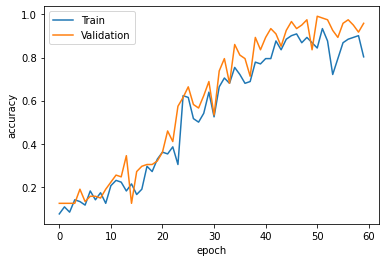

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Đây là tờ:  200K_VND


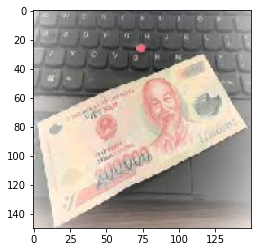

In [18]:
img = load_img('/content/drive/MyDrive/money_classification/Predict/7.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100',
 '10K_VND',
 '1K_VND',
 '200',
 '200K_VND',
 '20K_VND',
 '2K_VND',
 '500',
 '500K_VND',
 '50K_VND',
 '5K_VND']
print('Đây là tờ: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Đây là tờ:  500K_VND


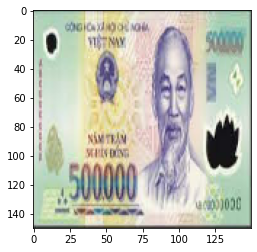

In [19]:
img = load_img('/content/drive/MyDrive/money_classification/Predict/3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100',
 '10K_VND',
 '1K_VND',
 '200',
 '200K_VND',
 '20K_VND',
 '2K_VND',
 '500',
 '500K_VND',
 '50K_VND',
 '5K_VND']
print('Đây là tờ: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Đây là tờ:  200


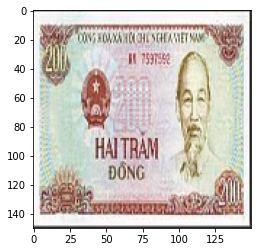

In [20]:
img = load_img('/content/drive/MyDrive/money_classification/Predict/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100',
 '10K_VND',
 '1K_VND',
 '200',
 '200K_VND',
 '20K_VND',
 '2K_VND',
 '500',
 '500K_VND',
 '50K_VND',
 '5K_VND']
print('Đây là tờ: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

In [21]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('money_classification.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 17:51:41--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 17:51:41 (26.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/money_classification.ipynb to pdf
[NbConvertApp] Support files will be in money_classification_files/
[NbConvertApp] Making directory ./money_classification_files
[NbConvertApp]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'